In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import warnings
from sklearn import linear_model

In [2]:
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

houseprices = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()

In [4]:
houseprices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [5]:
houseprices.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [6]:
# all the features that are categorical 
houseprices.loc[:,houseprices.dtypes == object].columns

Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype', 'salecondition'],
      dtype='object')

In [7]:
houseprices['saleprice'].isnull().value_counts() #no missing values in saleprice

False    1460
Name: saleprice, dtype: int64

In [8]:
# find which categorical variables consist only two different types of values 
for c in houseprices.loc[:,houseprices.dtypes == object].columns:
    print("------------------------------------------------")
    print("Value Count Column {}". format(c))
    print("------------------------------------------------")
    print(houseprices[c].value_counts())

#only street, alley, utilities, centralair variables have two types of values

------------------------------------------------
Value Count Column mszoning
------------------------------------------------
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: mszoning, dtype: int64
------------------------------------------------
Value Count Column street
------------------------------------------------
Pave    1454
Grvl       6
Name: street, dtype: int64
------------------------------------------------
Value Count Column alley
------------------------------------------------
Grvl    50
Pave    41
Name: alley, dtype: int64
------------------------------------------------
Value Count Column lotshape
------------------------------------------------
Reg    925
IR1    484
IR2     41
IR3     10
Name: lotshape, dtype: int64
------------------------------------------------
Value Count Column landcontour
------------------------------------------------
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: landcontour, dtype: int64
---------

In [14]:
categorical = pd.get_dummies(houseprices, columns = ['street', 'alley', 'utilities', 'centralair'], drop_first = True)
print(categorical.columns)

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'lotshape',
       'landcontour', 'lotconfig', 'landslope', 'neighborhood', 'condition1',
       'condition2', 'bldgtype', 'housestyle', 'overallqual', 'overallcond',
       'yearbuilt', 'yearremodadd', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'masvnrarea', 'exterqual', 'extercond',
       'foundation', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1',
       'bsmtfinsf1', 'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf',
       'heating', 'heatingqc', 'electrical', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paveddrive', 'wooddecksf', 'openporchsf',
       'enclosed

**Explore the data and find some variables that you think would be useful in predicting house prices.**

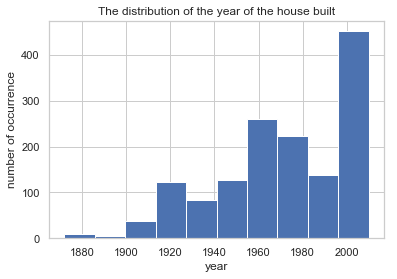

In [110]:
plt.hist(houseprices['yearbuilt'])
plt.title("The distribution of the year of the house built")
plt.xlabel("year")
plt.ylabel("number of occurrence")
plt.show()

In [17]:
# Y is the target variable
Y = categorical['saleprice']
# X is the feature set 
X = categorical[['street_Pave', 'utilities_NoSeWa', "centralair_Y"]]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [ 29308.76908621 -48808.35342841  80427.25302659]

Intercept: 
 76572.3313156068


In [18]:
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     33.17
Date:                Fri, 12 Jul 2019   Prob (F-statistic):           9.71e-21
Time:                        14:54:20   Log-Likelihood:                -18496.
No. Observations:                1460   AIC:                         3.700e+04
Df Residuals:                    1456   BIC:                         3.702e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7.657e+04   3.19e+04      2.402      0.016     1.4e+04    1.39e+05
street_Pave       2.931e+04   3.16e+04      0.929      0.353   -3.26e+04    9.12e+04
utilities_NoSeWa -4.881e+04    7.7e+04     -0.634      0.526      -2e+05    1.02e+05
centralair_Y      8.043e+04   8183.967      9.827      0.000    6.44e+04    9.65e+04
==============================================================================
Omnibus:                      650.842   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4068.354
Skew:                           1.987   Prob(JB):                         0.00
Kurtosis:                      10.147   Cond. No.                         64.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Assumption one: linearity of the model in its coefficients


Coefficients: 
 [ 29308.77009231 -48808.35000007  80427.25      ]

Intercept: 
 76572.28515625


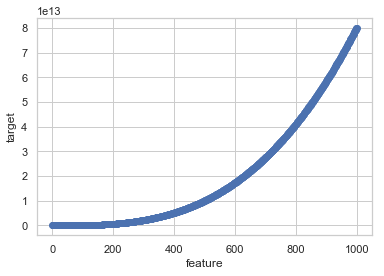

In [21]:
#


df = pd.DataFrame()
df['X'] = np.arange(0,1000,1)
df['X_sq'] = df['X'] ** 2
df['X_third'] = df['X'] ** 3

df['Y'] = 29308.77 * df['X'] -48808.35 * df['X_sq'] + 80427.25 * df['X_third'] + 76572.33

lrm_example = linear_model.LinearRegression()
lrm_example.fit(df[["X","X_sq", 'X_third']],df["Y"])

# predictions of the linear regression
predictions = lrm_example.predict(df[["X","X_sq", 'X_third']])

# we print the estimated coefficients
print('\nCoefficients: \n', lrm_example.coef_)
print('\nIntercept: \n', lrm_example.intercept_)

# we plot the estimated Y and X
# the relationship should be quadratic
plt.scatter(df["X"], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.show()


Assumption two: the error term should be zero on average


In [23]:
predictions = lrm.predict(df[["X","X_sq", 'X_third']])
errors = Y - predictions

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

ValueError: operands could not be broadcast together with shapes (1460,) (1000,) 